In [129]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [130]:
x1=pd.read_csv("C:\\Users\\admin\\Desktop\\Datasets\\diabetes knn\\Diabetes_XTrain.csv")
y1=pd.read_csv("C:\\Users\\admin\\Desktop\\Datasets\\diabetes knn\\Diabetes_YTrain.csv")

In [131]:
print(y1.shape)
print(x1.shape)

(576, 1)
(576, 8)


In [132]:
x1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [133]:
"""to check if the dataset has any missing value"""
x1.isnull().values.any()

False

In [134]:
"""to check which all columns in our training dataset have zero values,we will have to replace them"""
print("no of zeros in Pregnancies:{0}".format(len(x1.loc[x1['Pregnancies']==0])))
print("no of zeros in Glucose:{0}".format(len(x1.loc[x1['Glucose']==0])))
print("no of zeros in BloodPressure:{0}".format(len(x1.loc[x1['BloodPressure']==0])))
print("no of zeros in SkinThickness:{0}".format(len(x1.loc[x1['SkinThickness']==0])))
print("no of zeros in Insulin :{0}".format(len(x1.loc[x1['Insulin']==0])))
print("no of zeros in BMI:{0}".format(len(x1.loc[x1['BMI']==0])))
print("no of zeros in DiabetesPedigreeFunction:{0}".format(len(x1.loc[x1['DiabetesPedigreeFunction']==0])))
print("no of zeros in Age  :{0}".format(len(x1.loc[x1['Age']==0])))

no of zeros in Pregnancies:81
no of zeros in Glucose:3
no of zeros in BloodPressure:29
no of zeros in SkinThickness:171
no of zeros in Insulin :278
no of zeros in BMI:9
no of zeros in DiabetesPedigreeFunction:0
no of zeros in Age  :0


In [135]:
"""removing the zeroes"""


'removing the zeroes'

In [136]:
x=x1.values
y=y1.values

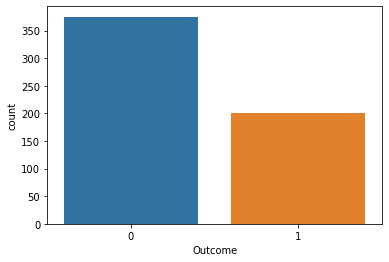

In [161]:
"""PLOTTING A BAR GRAPH"""
import seaborn as sns
sns.countplot(y1['Outcome'],label="count")

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [139]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(460, 8)
(460, 1)
(116, 8)
(116, 1)


In [140]:
#this is the method to remove the zeroes with the mean values

In [141]:
from sklearn.impute import SimpleImputer
fill_values=SimpleImputer(missing_values=0,strategy="mean")
x_train=fill_values.fit_transform(x_train)
x_test=fill_values.fit_transform(x_test)

In [142]:
"""Method 2 to remove the zeros(but you will have to use it before you define train_test_split)"""
#column_not_accepted=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI']
#for column in column_not_accepted:
    #x1[column]=x1[column].replace(0,np.NaN)
    #mean=int(x1[column].mean(skipna=True))
    #x1[column]=x1[column].replace(np.NaN,mean)

'Method 2 to remove the zeros(but you will have to use it before you define train_test_split)'

In [143]:
"""we will have to scale our dataor the features(this helps us to increase the accuracy)"""


'we will have to scale our dataor the features(this helps us to increase the accuracy)'

In [144]:
from sklearn.preprocessing import StandardScaler

In [145]:
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)

In [146]:
x_train

array([[ 2.22323480e-01,  7.09990791e-01,  4.57257805e-01, ...,
         1.77340418e+00, -8.82941847e-01,  1.15494221e+00],
       [-8.28087455e-01, -7.52465143e-01, -9.77743642e-01, ...,
         5.85306433e-01, -6.41911886e-02, -1.01761344e+00],
       [ 1.27273441e+00,  1.11713364e-01,  1.89225925e+00, ...,
        -1.00499312e-15, -7.52190791e-01,  1.73986104e+00],
       ...,
       [ 2.32314535e+00,  5.43802617e-01,  2.97813199e-01, ...,
         1.04409725e-01, -1.66924161e-01,  1.52224218e-01],
       [ 2.17688876e-15,  1.50769403e+00, -2.26584412e-15, ...,
        -2.28864619e-02,  1.13747328e+00, -2.65574948e-01],
       [-1.17822443e+00, -4.20088794e-01, -1.29663285e+00, ...,
        -1.02711194e+00,  1.11879455e+00, -8.50493779e-01]])

In [147]:
"""Now we will have to use knn for predictions"""

'Now we will have to use knn for predictions'

In [148]:
#to assume the value of k or n_neighbors use
import math
math.sqrt(len(y_test))

10.770329614269007

In [149]:
classifier=KNeighborsClassifier(n_neighbors=9,p=2,metric='euclidean')
classifier.fit(x_train,y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [150]:
print(x_test.shape)

(116, 8)


In [151]:
#now we predict
y_pred=classifier.predict(x_test)
y_pred

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1], dtype=int64)

In [152]:
print(y_test.shape)
print(y_pred.shape)
print(x_test.shape)

(116, 1)
(116,)
(116, 8)


In [153]:
y_pred=y_pred.reshape(y_test.shape[0])

In [154]:
"""ACCURACY"""
print(accuracy_score(y_test,y_pred))

0.7413793103448276


In [162]:
submission=pd.DataFrame({
    "Outcome":y_pred
})
submission.to_csv('submission_diabetes.csv',index=False)